In [4]:
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib as plt

In [5]:
# Load datasets

# For training
X_train = np.load('data/X_train.npy')
Y_train = np.load('data/Y_train.npy')

# For validation
X_val = np.load('data/X_val.npy')
Y_val = np.load('data/Y_val.npy')

In [15]:
# Initialize the model

model = keras.models.Sequential([
    keras.layers.SeparableConv1D(kernel_size=8, activation='tanh',padding='SAME',filters=32),
    keras.layers.MaxPooling1D(pool_size=2),
    keras.layers.SeparableConv1D(kernel_size=8, activation='tanh',padding='SAME',filters=64),
    keras.layers.SeparableConv1D(kernel_size=8, activation='tanh',padding='SAME',filters=64),
    keras.layers.MaxPooling1D(pool_size=2),
    keras.layers.SeparableConv1D(kernel_size=4, activation='relu',padding='SAME',filters=128),
    keras.layers.SeparableConv1D(kernel_size=4, activation='relu',padding='SAME',filters=128),
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(3)
])

model.compile(loss="mae", optimizer = keras.optimizers.Adam(),metrics=["mae"])

In [16]:
# Callbacks

early_stopping_cb = keras.callbacks.EarlyStopping(patience=500, monitor='val_mae',restore_best_weights=True)
learning_rate_cb = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=300)

In [17]:
# Train

history = model.fit(X_train, Y_train, epochs=5000, validation_data=(X_val, Y_val), batch_size=16, callbacks=[early_stopping_cb, learning_rate_cb], verbose=True)

Epoch 1/5000
16/16 [==============================] - 1s 12ms/step - loss: 15.7583 - mae: 15.7583 - val_loss: 15.3883 - val_mae: 15.3883 - lr: 0.0010
Epoch 2/5000
16/16 [==============================] - 0s 5ms/step - loss: 15.7532 - mae: 15.7532 - val_loss: 15.3876 - val_mae: 15.3876 - lr: 0.0010
Epoch 3/5000
16/16 [==============================] - 0s 4ms/step - loss: 15.7409 - mae: 15.7409 - val_loss: 15.3730 - val_mae: 15.3730 - lr: 0.0010
Epoch 4/5000
16/16 [==============================] - 0s 5ms/step - loss: 15.6423 - mae: 15.6423 - val_loss: 15.1298 - val_mae: 15.1298 - lr: 0.0010
Epoch 5/5000
16/16 [==============================] - 0s 5ms/step - loss: 15.0834 - mae: 15.0834 - val_loss: 14.5439 - val_mae: 14.5439 - lr: 0.0010
Epoch 6/5000
16/16 [==============================] - 0s 4ms/step - loss: 14.8739 - mae: 14.8739 - val_loss: 14.6025 - val_mae: 14.6025 - lr: 0.0010
Epoch 7/5000
16/16 [==============================] - 0s 5ms/step - loss: 14.7768 - mae: 14.7768 - val_lo

Text(0, 0.5, 'mae')

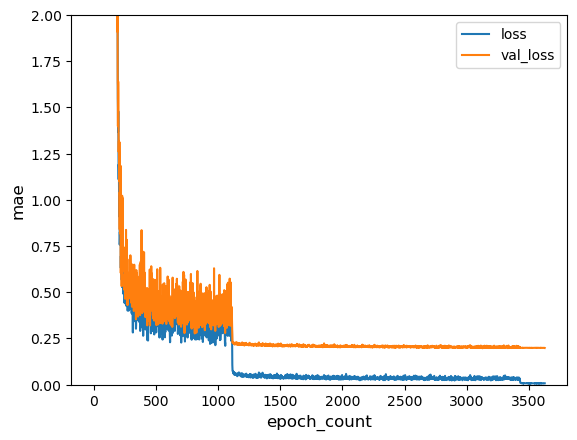

In [18]:
# Plot

h_cnn = history.history
history_df = pd.DataFrame(history.history)
ax= history_df.loc[:, ['loss', 'val_loss']].plot();
ax.set_ylim(0,2)
ax.set_xlabel(r'epoch_count',fontsize=12)
ax.set_ylabel(r'mae',fontsize=12)

# Test model

We test on a dataset which the model has not seen before

In [34]:
X_test = np.load('data/X_test.npy')
Y_test = np.load('data/Y_test.npy')

# Apply model to predict the target field
Y_pred = model.predict(X_test)

# Max absolute error
print(np.abs(Y_test-Y_pred).max())

8/8 [==============================] - 0s 1ms/step
2.1677357321836617


Let us visualize the model performance in terms of the magnitude of the predicted magnetic field.

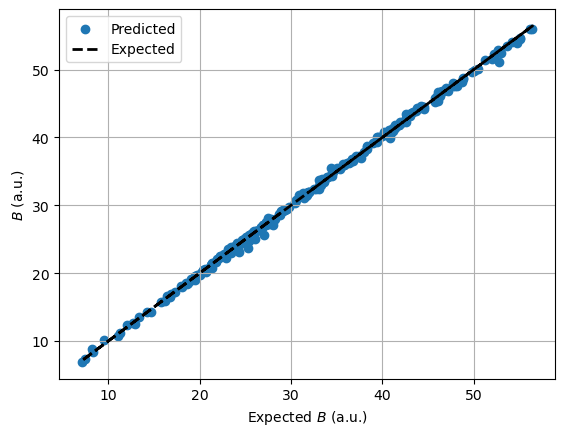

In [35]:
fig, ax = plt.subplots()
ax.scatter(np.sqrt((Y_test**2).sum(axis=1)), np.sqrt((Y_pred**2).sum(axis=1)), label = 'Predicted')
ax.plot(np.sqrt((Y_test**2).sum(axis=1)), np.sqrt((Y_test**2).sum(axis=1)), linewidth=2.0, ls='--', label = 'Expected', color = 'black')
ax.set_ylabel(r'$B$ (a.u.)')
ax.set_xlabel(r'Expected $B$ (a.u.)')
ax.legend(loc=0)
ax.grid()

# Save model

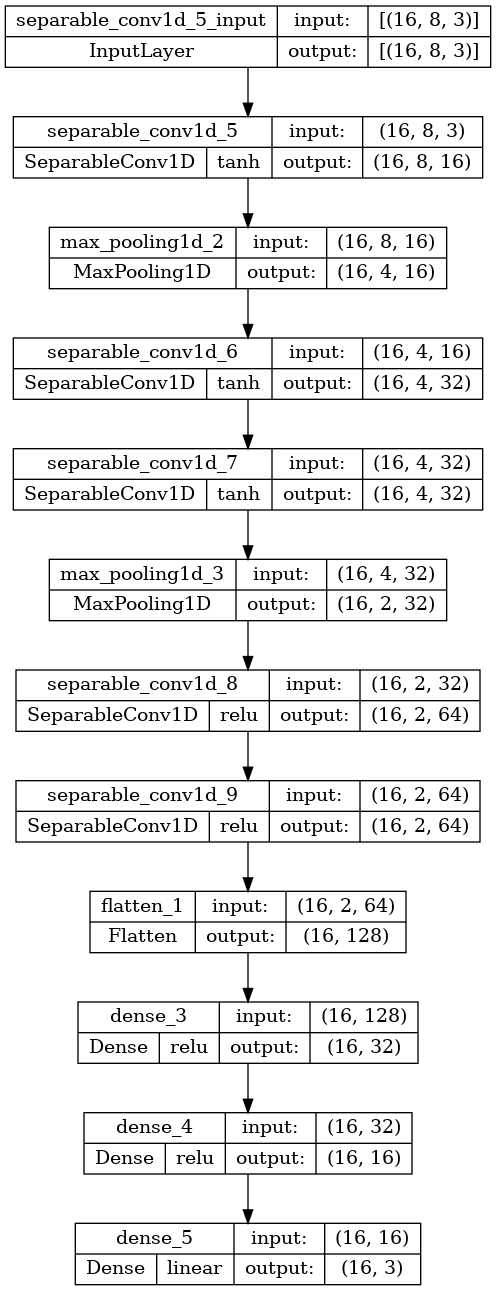

In [10]:
from keras.utils import plot_model
plot_model(model, show_shapes=True,
           to_file='model.png',show_layer_activations=True)

In [11]:
model.save('data/model.h5')